In [3]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('Real-estate.csv')

# Просмотр первых нескольких строк для понимания структуры данных
print(df.head())

# Отображение общей информации о данных
print(df.info())


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

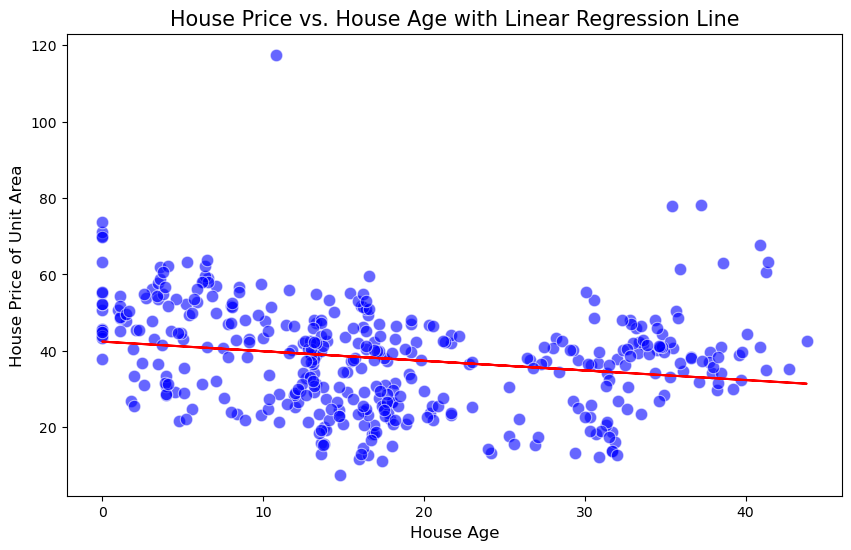

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Инициализируем модель линейной регрессии
linear_reg = LinearRegression()

# Обучаем модель, используя возраст дома как предиктор
X = df[['X2 house age']]
y = df['Y house price of unit area']
linear_reg.fit(X, y)

# Получаем предсказания модели для входных данных
predictions = linear_reg.predict(X)

# Создаем график рассеяния для данных
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=df, color='blue', alpha=0.6, edgecolor='w', s=80)

# Наносим линию линейной регрессии
plt.plot(df['X2 house age'], predictions, color='red')

# Настраиваем график
plt.title('House Price vs. House Age with Linear Regression Line', fontsize=15)
plt.xlabel('House Age', fontsize=12)
plt.ylabel('House Price of Unit Area', fontsize=12)
plt.show()


MSE: 176.50047403131393
RSS: 73071.19624896397
R^2 score: 0.04433848097791171
Dummy MSE: 184.68931783705574


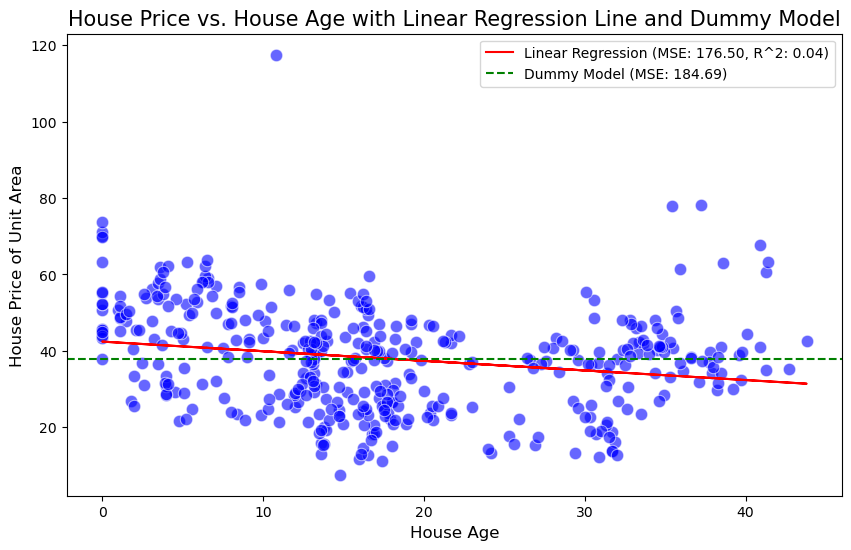

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Предсказания модели
predictions = linear_reg.predict(X)

# MSE
mse = mean_squared_error(y, predictions)
print(f"MSE: {mse}")

# RSS
rss = np.sum((y - predictions) ** 2)
print(f"RSS: {rss}")

# R^2 Score
r2 = r2_score(y, predictions)
print(f"R^2 score: {r2}")

# Dummy Model
mean_price = np.mean(y)
dummy_predictions = np.full(shape=y.shape, fill_value=mean_price)

# MSE for Dummy Model
dummy_mse = mean_squared_error(y, dummy_predictions)
print(f"Dummy MSE: {dummy_mse}")

# Visualisation
plt.figure(figsize=(10, 6))

# Real data
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=df, color='blue', alpha=0.6, edgecolor='w', s=80)

# Regression line
plt.plot(df['X2 house age'], predictions, color='red', label=f'Linear Regression (MSE: {mse:.2f}, R^2: {r2:.2f})')

# Dummy line
plt.axhline(mean_price, color='green', linestyle='--', label=f'Dummy Model (MSE: {dummy_mse:.2f})')

# Configure plot
plt.title('House Price vs. House Age with Linear Regression Line and Dummy Model', fontsize=15)
plt.xlabel('House Age', fontsize=12)
plt.ylabel('House Price of Unit Area', fontsize=12)
plt.legend()
plt.show()


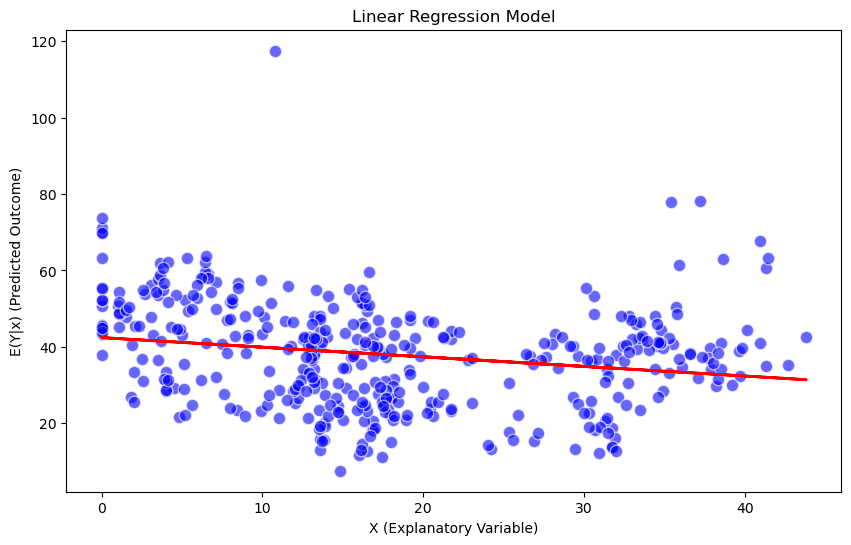

In [6]:
# Создание и обучение модели линейной регрессии
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Получение предсказаний и вычисление ожидаемых значений
predictions = linear_reg.predict(X)

# Визуализация модели
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, edgecolor='w', s=80)  # Реальные данные
plt.plot(X, predictions, color='red', lw=2)  # Линия регрессии
plt.title('Linear Regression Model')
plt.xlabel('X (Explanatory Variable)')
plt.ylabel('E(Y|x) (Predicted Outcome)')
plt.show()


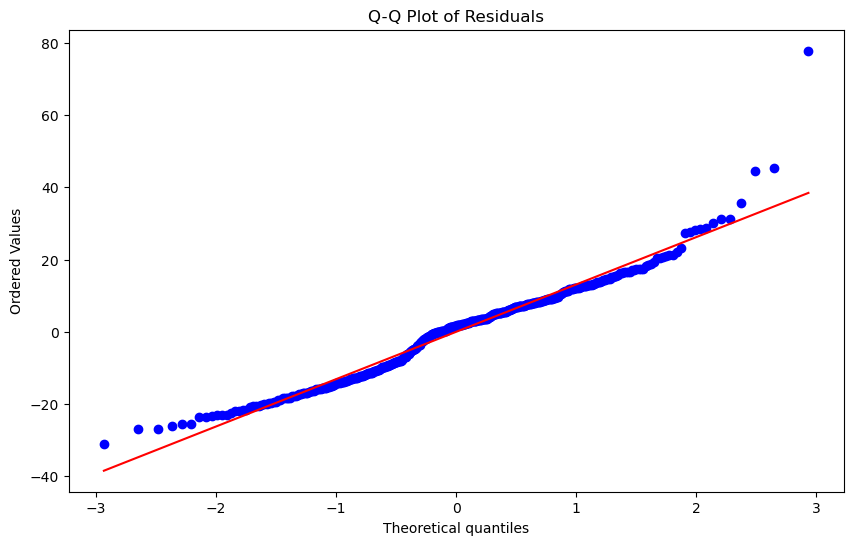

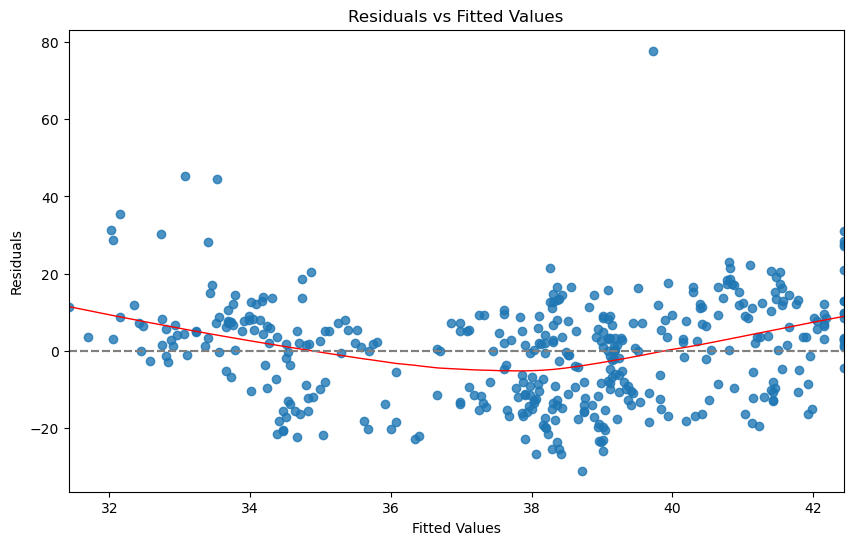

In [7]:
from scipy.stats import probplot

# Расчет остатков
residuals = y - predictions

# Q-Q plot для остатков для проверки нормальности
plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# График остатков против предсказанных значений для проверки гомоскедастичности
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()


In [8]:
# Получение коэффициентов модели
intercept = linear_reg.intercept_
slope = linear_reg.coef_[0]

print(f"Intercept (β0): {intercept}")
print(f"Slope (β1): {slope}")


Intercept (β0): 42.4346970462629
Slope (β1): -0.2514884190853456


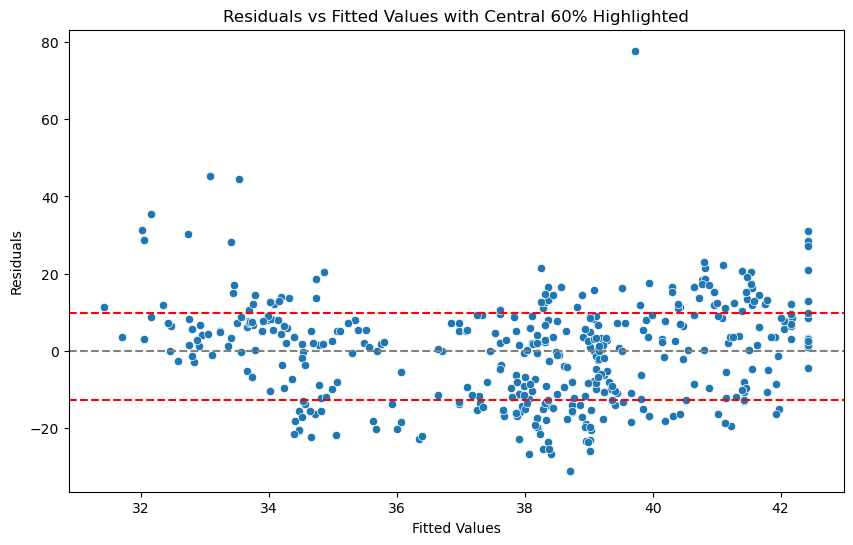

In [9]:
# Вычисление 20-го и 80-го процентилей остатков
lower_bound = np.percentile(residuals, 20)
upper_bound = np.percentile(residuals, 80)

# Построение графика остатков с подсветкой центральных 60%
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=lower_bound, color='red', linestyle='--')
plt.axhline(y=upper_bound, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values with Central 60% Highlighted')
plt.show()


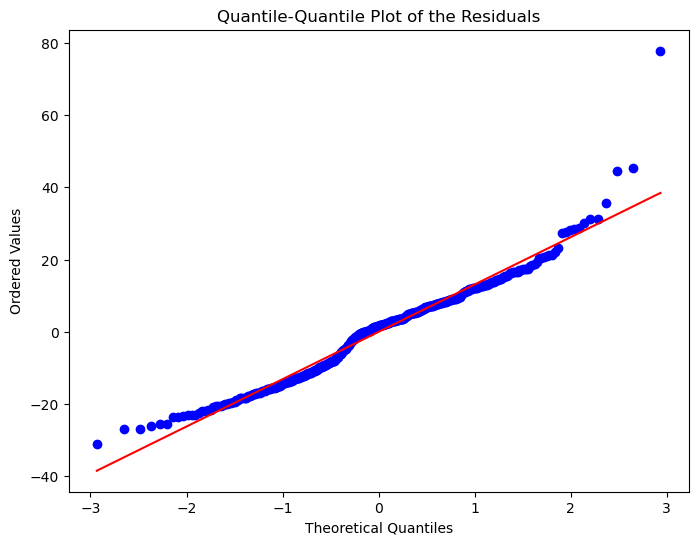

In [10]:
from scipy.stats import probplot

# Расчет остатков
residuals = y - predictions

# Квантиль-нормальный график остатков
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Quantile-Quantile Plot of the Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()
